In [1]:
#make SS_VER=SS_VER_1_1 PLATFORM=CW308_STM32F4 CRYPTO_TARGET=NONE CRYPTO_PATH=mkm4-main --trace
import chipwhisperer as cw
scope = cw.scope()
# target = cw.target(scope, cw.targets.SimpleSerial)
target = cw.target(scope, cw.targets.SimpleSerial2)

In [2]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CW308_STM32F4'
CRYPTO_TARGET = 'NONE'
# SS_VER='SS_VER_1_1'
CRYPTO_PATH = 'Kyber768'
SS_VER='SS_VER_2_1'

In [12]:
%%bash -s "$SS_VER" "$PLATFORM" "$CRYPTO_TARGET" "$CRYPTO_PATH"
make SS_VER=$1 PLATFORM=$2 CRYPTO_TARGET=$3 CRYPTO_PATH=$4

Building for platform CW308_STM32F4 with CRYPTO_TARGET=NONE
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
Building for platform CW308_STM32F4 with CRYPTO_TARGET=NONE
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
#@rm -f -- simpleserial-kyber.i pqm4/crypto_kem/ml-kem-768/m4fspeed/cbd.i pqm4/crypto_kem/ml-kem-768/m4fspeed/indcpa.i pqm4/crypto_kem/ml-kem-768/m4fspeed/kem.i pqm4/crypto_kem/ml-kem-768/m4fspeed/matacc.i pqm4/crypto_kem/ml-kem-768/m4fspeed/ntt.i pqm4/crypto_kem/ml-kem-768/m4fspeed/poly.i pqm4/crypto_kem/ml-kem-768/m4fspeed/polyvec.i pqm4/crypto_kem/ml-kem-768/m4fspeed/symmetric-fips202.i pqm4/crypto_kem/ml-kem-768/m4fspeed/verify.i pqm4/common/aes.i pqm4/common/aes-publicinputs.i pqm4/common/crypto_hashblocks_sha512.i pqm4/common/hal-stm32f4.i pqm4/common/randombytes.i pqm4/libopencm3/lib/stm32/common/rng_common_v1.i pqm4/mupq/common/fips202.i simpleserial.i simpleserial.i stm32f4_hal.i stm32f4_hal_lowlevel.i stm32f4_sysmem.i stm32f4xx_hal_rng.i
make[1]: '.dep' is up 

/opt/arm-gnu-toolchain-11.3.rel1-x86_64-arm-none-eabi/bin/../lib/gcc/arm-none-eabi/11.3.1/../../../../arm-none-eabi/bin/ld: /opt/arm-gnu-toolchain-11.3.rel1-x86_64-arm-none-eabi/bin/../lib/gcc/arm-none-eabi/11.3.1/../../../../arm-none-eabi/lib/thumb/v7e-m+fp/hard/libg.a(libc_a-closer.o): in function `_close_r':
/data/jenkins/workspace/GNU-toolchain/arm-11/src/newlib-cygwin/newlib/libc/reent/closer.c:47: warning: _close is not implemented and will always fail
/opt/arm-gnu-toolchain-11.3.rel1-x86_64-arm-none-eabi/bin/../lib/gcc/arm-none-eabi/11.3.1/../../../../arm-none-eabi/bin/ld: /opt/arm-gnu-toolchain-11.3.rel1-x86_64-arm-none-eabi/bin/../lib/gcc/arm-none-eabi/11.3.1/../../../../arm-none-eabi/lib/thumb/v7e-m+fp/hard/libg.a(libc_a-lseekr.o): in function `_lseek_r':
/data/jenkins/workspace/GNU-toolchain/arm-11/src/newlib-cygwin/newlib/libc/reent/lseekr.c:49: warning: _lseek is not implemented and will always fail
/opt/arm-gnu-toolchain-11.3.rel1-x86_64-arm-none-eabi/bin/../lib/gcc/arm-n

-e Done!
.
Creating load file for Flash: simpleserial-kyber-CW308_STM32F4.hex
arm-none-eabi-objcopy -O ihex -R .eeprom -R .fuse -R .lock -R .signature simpleserial-kyber-CW308_STM32F4.elf simpleserial-kyber-CW308_STM32F4.hex
.
Creating load file for Flash: simpleserial-kyber-CW308_STM32F4.bin
arm-none-eabi-objcopy -O binary -R .eeprom -R .fuse -R .lock -R .signature simpleserial-kyber-CW308_STM32F4.elf simpleserial-kyber-CW308_STM32F4.bin
.
Creating load file for EEPROM: simpleserial-kyber-CW308_STM32F4.eep
arm-none-eabi-objcopy -j .eeprom --set-section-flags=.eeprom="alloc,load" \
--change-section-lma .eeprom=0 --no-change-warnings -O ihex simpleserial-kyber-CW308_STM32F4.elf simpleserial-kyber-CW308_STM32F4.eep || exit 0
.
Creating Extended Listing: simpleserial-kyber-CW308_STM32F4.lss
arm-none-eabi-objdump -h -S -z simpleserial-kyber-CW308_STM32F4.elf > simpleserial-kyber-CW308_STM32F4.lss
.
Creating Symbol Table: simpleserial-kyber-CW308_STM32F4.sym
arm-none-eabi-nm -n simpleserial

In [13]:
%run "../../../../jupyter/Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍


In [14]:
fw_path = "simpleserial-kyber-{}.hex".format(PLATFORM)
cw.program_target(scope, prog, fw_path)

Detected known STMF32: STM32F40xxx/41xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 28523 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 28523 bytes


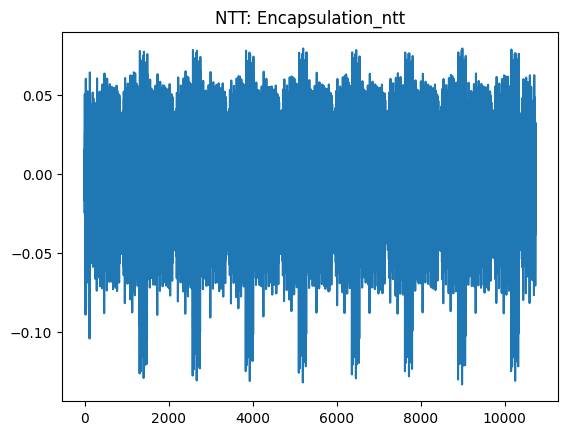

In [16]:
import matplotlib.pyplot as plt
import h5py
# Command
CMD_KYBER = 'a'
CMD_ECHO_TEST = 's'
CMD_READ = 'r'
CMD_SEND_CHAR = 'b'
CMD_SND_SK = 'k'

data = bytearray([])
# data = bytearray([0x11, 0x12, 0x13, 0x14, 0x15, 0x16, 0x17, 0x18, 0x19])
# print(data)
from tqdm import tnrange, trange
import numpy as np
import time

traces = []
N = 100

scope.clock.clkgen_mul = 2
# scope.clock.adc_src = "clkgen_x4"
# scope.clock.reset_clkgen()


# The number of samples that the scope should collect in each measurement.
# scope.adc.decimate = 1
scope.default_setup()
scope.adc.samples = 10740

chunk_size = 151
num_chunk =16
ALL_SK = []
ALL_MP = []
ALL_INPUT_SP = []
ALL_OUTPUT_SP = []
key_gen_coin = []
shared_key = []
encap_coin = []

for i in range(N):
    SK = []
    MP = []
    SP_IN = []
    SP_OUT = []
    reset_target(scope)
    target.flush()
    scope.arm()
    target.send_cmd(CMD_KYBER, 0x00, data)
    
    # To read key pair generation coin from the UART buffer
    response = target.read_cmd(cmd=CMD_READ, pay_len=None, timeout=250)
#     print(len(response))
    target.write(CMD_SEND_CHAR)
    key_gen_coin.append(list(response[3:35]))
    
    # To read encapsulation coin from the UART buffer
    response = target.read_cmd(cmd=CMD_READ, pay_len=None, timeout=250)
#     print(len(response))
    target.write(CMD_SEND_CHAR)
    encap_coin.append(list(response[3:35]))
    
    # To read SP_input (the noise in encapsuation). Its size is 1536 bytes. 192*8 =1536
    for j in range(12):
        response = target.read_cmd(cmd=CMD_READ, pay_len=None, timeout=250)
#         print(len(response))
        SP_IN.append(list(response[3:131]))
        target.write(CMD_SEND_CHAR)
    flatten_SP_IN = list(np.concatenate(SP_IN).flat)
#     print(len(flatten_SP))
    ALL_INPUT_SP.append(flatten_SP_IN)
    
    scope.capture()
    
    # To read SP_output (the noise in encapsuation). Its size is 1536 bytes. 192*8 =1536
    for j in range(12):
        response = target.read_cmd(cmd=CMD_READ, pay_len=None, timeout=250)
#         print(len(response))
        SP_OUT.append(list(response[3:131]))
        target.write(CMD_SEND_CHAR)
    flatten_SP_OUT = list(np.concatenate(SP_OUT).flat)
#     print(len(flatten_SP))
    ALL_OUTPUT_SP.append(flatten_SP_OUT)
    
     # To read shared-key from the UART buffer
    response = target.read_cmd(cmd=CMD_READ, pay_len=None, timeout=250)
#     print(len(response))
    target.write(CMD_SEND_CHAR)
    shared_key.append(list(response[11:43]))
    
    # To read PK from the UART buffer in chunks
    for j in range(4):
        response = target.read_cmd(cmd=CMD_READ, pay_len=None, timeout=250)
#         print(len(response))
        MP.append(list(response[3:131]))
        target.write(CMD_SEND_CHAR)
    flatten_MP = list(np.concatenate(MP).flat)
#     print(len(flatten_MP))

    for q in range(256):
        first_byte = flatten_MP[2*q]
        second_byte = flatten_MP[2*q+1]
        coeff = bytes([first_byte, second_byte ])
#         print(first_byte, second_byte, coeff)
#         print(int.from_bytes(coeff, byteorder='little', signed=True), coeff)
    # print(len(flatten_MP))
    ALL_MP.append(flatten_MP)

    # To read SK from the UART buffer in chunks
    for j in range(num_chunk):
        response = target.read_cmd(cmd=CMD_READ, pay_len=None, timeout=250)
        if(j==0):
            SK.append(list(response[11:154]))
        elif(j==num_chunk-1):
            SK.append(list(response[3:146]))
        else:
            SK.append(list(response[3:154]))
        target.write(CMD_SEND_CHAR)

    flatten_SK = list(np.concatenate(SK).flat)
    # print(len(flatten_SK))
    ALL_SK.append(flatten_SK)
    
    trace = scope.get_last_trace(as_int=False)
    # print(len(trace))
    if trace is None:
        continue
    traces.append(trace)
    # print(scope.adc.trig_count)

data_dict = {
    'Profiling_traces': {
        'Traces': np.asarray(traces),
        'Ciphertext': np.asarray(ALL_MP),
        'Secret_Key': np.asarray(ALL_SK),
        'Shared_Key': np.asarray(shared_key),
        'NTT_IN_Coefficients': np.asarray(ALL_INPUT_SP),
        'NTT_OUT_Coefficients': np.asarray(ALL_OUTPUT_SP),
        'Key_Generation_coin': np.asarray(key_gen_coin),
        'Encapsulation_coin': np.asarray(encap_coin),
        },
}

h5f = h5py.File('Profiling_Dataset_8_7.h5', 'w')
for grp_name in data_dict:
    grp = h5f.create_group(grp_name)
    for dset_name in data_dict[grp_name]:
        dset = grp.create_dataset(dset_name, data=data_dict[grp_name][dset_name])
h5f.close()


plt.plot(np.mean(np.array(traces), axis=0))
plt.title("NTT: Encapsulation_ntt")
plt.savefig("encapsulation_ntt.png")
plt.show()

In [21]:
def load_dataset(dataset_file):
        in_file = h5py.File(dataset_file, "r")

        train_data = np.array(in_file['Profiling_traces/Traces'])
        Ciphertext = np.array(in_file['Profiling_traces/Ciphertext'])
        Secret_key = np.array(in_file['Profiling_traces/Secret_Key'])        
        Shared_Key = np.array(in_file['Profiling_traces/Shared_Key'])
        NTT_in_coef = np.array(in_file['Profiling_traces/NTT_IN_Coefficients'])
        NTT_out_coef = np.array(in_file['Profiling_traces/NTT_OUT_Coefficients'])
        Key_coin = np.array(in_file['Profiling_traces/Key_Generation_coin'])
        enc_coin = np.array(in_file['Profiling_traces/Encapsulation_coin'])

        return train_data, Secret_key, Ciphertext, Shared_Key, NTT_in_coef, NTT_out_coef, Key_coin, enc_coin

In [22]:
 train_data, Secret_key, Ciphertext, Shared_Key, NTT_in_coef, NTT_out_coef, Key_coin, enc_coin = load_dataset('Profiling_Dataset_8_7.h5')

In [23]:
print(train_data.shape)
print(Secret_key.shape)
print(Ciphertext.shape)
print(Shared_Key.shape)
print(NTT_in_coef.shape)
print(NTT_out_coef.shape)
print(Key_coin.shape)
print(enc_coin.shape)

(100, 10740)
(100, 2400)
(100, 512)
(100, 32)
(100, 1536)
(100, 1536)
(100, 32)
(100, 32)


In [33]:
print(NTT_in_coef[15])

[  0   0   2 ... 255   1   0]


In [ ]:
array = [hex(s) for s in Secret_key[0]]
print(len(array))
for i,a in enumerate(array):
    if len(a)==3:
        t='0x0'+a[2]
        a=t
        array[i] = a

temp=''.join(byte[2:] for byte in array)
print(temp)
# print([hex(s) for s in Secret_key[0]])

array = [hex(s) for s in Ciphertext[0]]
for i,a in enumerate(array):
    if len(a)==3:
        t='0x0'+a[2]
        a=t

        array[i] = a

temp=''.join(byte[2:] for byte in array)
print(temp)
# print([hex(c) for c in Ciphertext[0]])

In [ ]:
array = [hex(s) for s in Ciphertext[0]]
for i,a in enumerate(array):
    if len(a)==3:
        t='0x0'+a[2]
        a=t

        array[i] = a

temp=''.join(byte[2:] for byte in array)
print(temp)

In [ ]:
scope.dis()
target.dis()